In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
import os

In [3]:
M = 1.989e30 #kg
G = 6.6741e-11 # m^3/kg/s^2
AU = 149597870700 #m

In [4]:
x0 = np.array([0, 0.586]) * AU # m
v0 = np.array([54600, 0]) # m/s


In [5]:
def a(r: np.ndarray):
    return -G * M * r / np.power(np.sqrt(r[0] ** 2 + r[1] ** 2), 3)
    

In [6]:
class Euler:
    def __init__(self, tmax: int, dt: float):
        self.x = None
        self.v = None
        self.t = None
        self.dt = None
        self.update_params(tmax, dt)

    def update_params(self, tmax: int, dt: float):
        num = int(tmax//dt)
        self.x = np.zeros((num, 2))
        self.v = np.zeros((num, 2))
        self.t = np.linspace(0, tmax, num=num)
        self.dt = dt

    def get_next_step(self, i: int):
        last_x = self.x[i]
        last_v = self.v[i]
        new_x = last_x + last_v * self.dt
        new_v = last_v + a(last_x) * self.dt
        return new_x, new_v
    
    def set_new_values(self, x: np.ndarray, v: np.ndarray, i):
        self.x[i] = x
        self.v[i] = v

    def calculate(self):
        for i in range(len(self.t)):
            if i == 0:
                self.set_new_values(x0, v0, 0)
                continue
            x, y = self.get_next_step(i-1)
            self.set_new_values(x, y, i)

In [38]:
class RK4:
    def __init__(self, tmax: int, dt: float):
        self.r = None
        self.v = None
        self.t = None
        self.dt = None
        self.update_params(tmax, dt)

    def update_params(self, tmax: int, dt: float):
        num = int(tmax//dt)
        self.r = np.zeros((num, 2))
        self.v = np.zeros((num, 2))
        
        self.t = np.linspace(0, tmax, num=num)
        self.dt = dt
    
    def k(self, i: int) -> np.ndarray:
        output = np.zeros((4, 4))
        output[0, 0] = self.v[i, 0]
        output[0, 1] = self.v[i, 1]
        new_a = a(self.r[i])
        output[0, 2] = new_a[0]
        output[0, 3] = new_a[1]

        output[1, 0] = self.v[i, 0] + output[0, 2] * self.dt / 2
        output[1, 1] = self.v[i, 1] + output[0, 3] * self.dt / 2
        new_a = a(self.r[i] + output[0, :2] * self.dt / 2)
        output[1, 2] = new_a[0]
        output[1, 3] = new_a[1]

        output[2, 0] = self.v[i, 0] + output[1, 2] * self.dt / 2
        output[2, 1] = self.v[i, 1] + output[1, 3] * self.dt / 2
        new_a = a(self.r[i] + output[1, :2] * self.dt / 2)
        output[2, 2] = new_a[0]
        output[2, 3] = new_a[1]

        output[3, 0] = self.v[i, 0] + output[2, 2] * self.dt
        output[3, 1] = self.v[i, 1] + output[2, 3] * self.dt
        new_a = a(self.r[i] + output[2, :2] * self.dt)
        output[3, 2] = new_a[0]
        output[3, 3] = new_a[1]
        return output
    
    def set_new_values(self, i):
        k = self.k(i-1)
        self.r[i] = self.r[i-1] + self.dt / 6 * (k[0, :2] + 2*k[1, :2] + 2*k[2, :2] + k[3, :2])
        self.v[i] = self.v[i-1] + self.dt / 6 * (k[0, 2:] + 2*k[1, 2:] + 2*k[2, 2:] + k[3, 2:])

    def calculate(self):
        self.r[0] = x0
        self.v[0] = v0
        for i in range(1, len(self.t)):
            self.set_new_values(i)

    def speed(self):
        output = np.zeros(len(self.t))
        output = np.sqrt(self.v[:, 0]**2 + self.v[:, 1]**2)
        return output



In [39]:
s1 = RK4(5000000000, 2000)
s1.calculate()

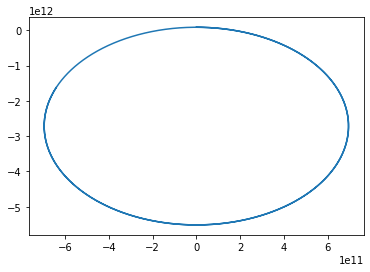

In [20]:
# a_arr = np.array([a(s.r[i]) for i in range(len(s.t))])
plt.plot(s1.r[:, 0], s1.r[:, 1])


In [21]:
s.v

NameError: name 's' is not defined

In [22]:
speed = s.speed()
plt.plot(s.t, speed)

NameError: name 's' is not defined

In [23]:
a_arr = np.array([a(s.r[i]) for i in range(len(s.t))])

NameError: name 's' is not defined

In [24]:
plt.scatter(s.r[:, 0], s.r[:, 1])

NameError: name 's' is not defined

In [25]:
class Plotter:
    def __init__(self, solver: Euler, dir: str):
        self.solver = solver
        self.dir = dir
        if not os.path.exists(dir):
            os.makedirs(dir)
        

    def plot(self, filename: str):
        fig, [ax1, ax2] = plt.subplots(2, 1)
        ax1.plot(self.solver.x[:, 0], self.solver.x[:, 1])
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax2.plot(self.solver.t, self.solver.x[:, 1])
        ax2.set_xlabel('t')
        ax2.set_ylabel('y')
        fig.savefig(f"{self.dir}/{filename}.png")



In [35]:
class Handler:
    def __init__(self):
        self.dir = "output"
    
    def euler_fixed_dt(self):
        solver = Euler(5000000000, 2000)
        solver.calculate()
        plotter = Plotter(solver, self.dir)
        plotter.plot("euler_fixed")
        return solver

    def rk4_fixed_dt(self):
        solver = RK4(5000000000, 2000)
        solver.calculate()
        plotter = Plotter(solver, self.dir)
        plotter.plot("rk4_fixed")
        return solver

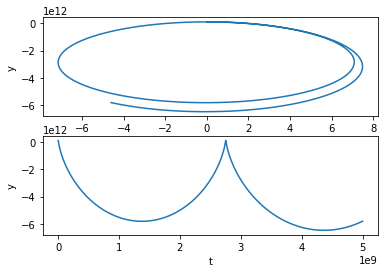

In [36]:
h = Handler()
s2 = h.euler_fixed_dt()

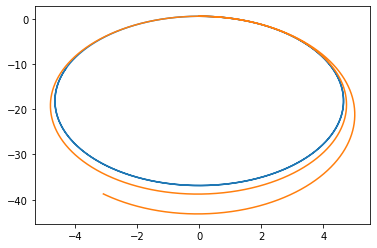

In [37]:
plt.plot(s1.r[:, 0]/AU, s1.r[:, 1]/AU)
plt.plot(s2.x[:, 0]/AU, s2.x[:, 1]/AU)

In [29]:
plt.plot(s.t, s.v)


NameError: name 's' is not defined